## Pricing Factory:
* [1. Libraries](#first-bullet)
* [2. Load data and tables](#second-bullet)
* [3. Notebook functions](#third-bullet)
* [4. Offsets and special adjustments](#fourth-bullet)
* [5. Pricing factory](#fifth-bullet)

## 1. Libraries <a class="anchor" id="first-bullet"></a>

In [1]:
import pandas as pd
import datarobot as dr
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

## 2. Load data and tables <a class="anchor" id="second-bullet"></a>

In [3]:
# read in data
data_in = pd.read_csv("input_data_data_robot2.csv", encoding = 'ISO-8859-1')
coverage_tbl = pd.read_csv("coverage_lookup.csv")
model_vars = pd.read_excel("var_list.xlsx")
pd.options.display.max_columns = 200
pd.options.display.max_rows = 100
data_in.head()

/Users/quncai.zou/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (48,49,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ndspolicyid,EndorsementNum,VehicleNum,TermEffectiveDate,TermExpirationDate,effectivedate,pol_year,term,policysuffixnum,SourceSystemCode,GoverningStateCode,OriginalEffectiveDate,tenure,num_non_drv,num_excl_drv,num_oth_ins_drv,num_drv,PPAVehNum,package,EFT,ADQ,SR22,PIF,Paperless,tier_rad6,BIGroup,VehAge_incept,HO,class_ins_exp,any_acc_ind_p,any_acc_ind_gt36_p,ActionCode_v5,SRMActionCode,ProductVersionName,DistributionChannel,veh_hist_v2,ModelYearNum,VIN,symbol8bi,symbol8mp,symbol8cp,symbol8cl,GaragingZipCode,Terr_bipd,Terr_CP,Terr_CL,Terr_mppip,limitbi,limitpd,dedcl,dedcp,PIP_lmt,limitmp,YoungDrv,OldDrv,Parent_Child,VehAge,youthful_pni,youthful_on_pol,parent_child_rel_on_pol,PNIAge,BI_EP,PD_EP,MED_EP,PIP_EP,COLL_EP,COMP_EP,biinc,pdinc,mpinc,pipinc,cpinc,clinc,biclc,pdclc,mpclc,pipclc,cpclc,clclc,biexp,pdexp,mpexp,pipexp,cpexp,clexp,tot_exp,tot_ep,totinc,tot_clc,SpeedsCount_gt36_pol,SppCount_gt36_pol,SpdCount_gt36_pol,DwisCount_gt36_pol,MinorCount_gt36_pol,MajorCount_gt36_pol,AfaCount_gt36_pol,NafaCount_gt36_pol,SpeedsCount_pol,SppCount_pol,SpdCount_pol,DwisCount_pol,MinorCount_pol,MajorCount_pol,AfaCount_pol,NafaCount_pol,biprem_theo,pdprem_theo,cpprem_theo,clprem_theo,mpprem_theo,pipprem_theo
0,1019432,0,1,01JAN2013:00:00:00,01JUL2013:00:00:00,01JAN2013:00:00:00,2013,6,0,N,OH,01JUL2008:00:00:00,54,0,0,0,2,3,0,0,0,0,1,0,3.0,4,12,1,z.a.N,NaN,NaN,E,F,RAD3.5,Direct,15.0,2001,1G8JU52F81Y546761,B,B,04,09,45014,18,01,09,11,100/300,50,500,500,NaN,NaN,22,58,1,12.0,0,0,1,58,56.564384,58.997260,0.0,0.0,69.336986,20.071233,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.304110,0.304110,NaN,NaN,0.304110,0.304110,0.304110,204.969863,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.09,34.01,3.72,21.82,NaN,NaN
1,1019432,0,2,01JAN2013:00:00:00,01JUL2013:00:00:00,01JAN2013:00:00:00,2013,6,0,N,OH,01JUL2008:00:00:00,54,0,0,0,2,3,0,0,0,0,1,0,3.0,4,13,1,z.a.N,NaN,NaN,E,F,RAD3.5,Direct,7.0,2000,1B7HC16YXYS510210,E,9,10,10,45014,18,01,09,11,100/300,50,500,500,NaN,NaN,22,58,1,13.0,0,0,1,58,63.254795,66.295890,0.0,0.0,66.295890,22.504110,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.304110,0.304110,NaN,NaN,0.304110,0.304110,0.304110,218.350685,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48.59,43.38,5.19,21.36,NaN,NaN
2,1019432,0,3,01JAN2013:00:00:00,01JUL2013:00:00:00,01JAN2013:00:00:00,2013,6,0,N,OH,01JUL2008:00:00:00,54,0,0,0,2,3,0,0,0,0,1,0,3.0,4,3,1,z.a.N,NaN,NaN,E,F,RAD3.5,Direct,4.0,2010,4A32B2FFXAE008943,G,J,17,33,45014,18,01,09,11,100/300,50,500,500,NaN,NaN,22,58,1,3.0,0,0,1,58,66.904110,70.553425,0.0,0.0,145.364384,26.153425,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.304110,0.304110,NaN,NaN,0.304110,0.304110,0.304110,308.975342,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.23,46.63,10.24,55.46,NaN,NaN
3,1019432,1,2,01JAN2013:00:00:00,01JUL2013:00:00:00,22APR2013:00:00:00,2013,6,0,N,OH,01JUL2008:00:00:00,54,0,0,0,2,2,0,0,0,0,1,0,3.0,4,13,1,z.a.N,NaN,NaN,E,G,RAD3.5,Direct,7.0,2000,1B7HC16YXYS510210,E,9,10,10,45014,18,01,09,11,100/300,50,500,500,NaN,NaN,22,58,1,13.0,0,0,1,58,37.589041,39.506849,0.0,0.0,39.506849,14.191781,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.191781,0.191781,NaN,NaN,0.191781,0.191781,0.191781,130.794521,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33.66,30.05,3.02,13.64,NaN,NaN
4,1019432,1,3,01JAN2013:00:00:00,01JUL2013:00:00:00,22APR2013:00:00:00,2013,6,0,N,OH,01JUL2008:00:00:00,54,0,0,0,2,2,0,0,0,0,1,0,3.0,4,3,1,z.a.N,NaN,NaN,E,G,RAD3.5,Direct,4.0,2010,4A32B2FFXAE008943,G,J,17,33,45014,18,01,09,11,100/300,50,500,500,NaN,NaN,22,58,1,3.0,0,0,1,58,39.890411,41.808219,0.0,0.0,85.917808,16.493151,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.191781,0.191781,NaN,NaN,0.191781,0.191781,0.191781,184.109589,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.18,32.30,5.97,35.41,NaN,NaN


In [31]:
data_in[data_in["clexp"]>0].GoverningStateCode.value_counts()
# data_in.GoverningStateCode.value_counts()
# df_CA = data_in[data_in["GoverningStateCode"]=="MI"]
# df_CA[df_CA["clexp"]>0].groupby("DistributionChannel").agg("count")
# len(df_CA.clinc.unique())

array(['OH', 'OH', 'OH', ..., 'VA', 'VA', 'VA'], dtype=object)

In [6]:
coverage_tbl

,Coverage,Earned_Premium,Incurred_Loss,Claim_Count,Earned_Exposure,Offset,Offset_log
0,BI,BI_EP,biinc,biclc,biexp,biprem_theo,biprem_theo_offset
1,PD,PD_EP,pdinc,pdclc,pdexp,pdprem_theo,pdprem_theo_offset
2,MED,MED_EP,mpinc,mpclc,mpexp,mpprem_theo,mpprem_theo_offset
3,PIP,PIP_EP,pipinc,pipclc,pipexp,pipprem_theo,pipprem_theo_offset
4,COLL,COLL_EP,clinc,clclc,clexp,clprem_theo,clprem_theo_offset
5,COMP,COMP_EP,cpinc,cpclc,cpexp,cpprem_theo,cpprem_theo_offset
6,TOTAL,tot_ep,totinc,tot_clc,tot_exp,NaN,NaN


In [9]:
model_vars

,BI,COLL,COMP,MED,PD,PIP
0,pol_year,pol_year,pol_year,pol_year,pol_year,pol_year
1,term,term,term,term,term,term
2,SourceSystemCode,SourceSystemCode,SourceSystemCode,SourceSystemCode,SourceSystemCode,SourceSystemCode
3,GoverningStateCode,GoverningStateCode,GoverningStateCode,GoverningStateCode,GoverningStateCode,GoverningStateCode
4,OriginalEffectiveDate,OriginalEffectiveDate,OriginalEffectiveDate,OriginalEffectiveDate,OriginalEffectiveDate,OriginalEffectiveDate
5,tenure,tenure,tenure,tenure,tenure,tenure
6,num_non_drv,num_non_drv,num_non_drv,num_non_drv,num_non_drv,num_non_drv
7,num_excl_drv,num_excl_drv,num_excl_drv,num_excl_drv,num_excl_drv,num_excl_drv
8,num_oth_ins_drv,num_oth_ins_drv,num_oth_ins_drv,num_oth_ins_drv,num_oth_ins_drv,num_oth_ins_drv
9,num_drv,num_drv,num_drv,num_drv,num_drv,num_drv


## 3. Notebook functions <a class="anchor" id="third-bullet"></a>

In [12]:
# log offset columns
def offset_log(df, col_dict):
    for i in col_dict:
        df[i + '_offset'] = np.log(df[i])
    return(df)

In [24]:
loss_col = coverage_tbl[coverage_tbl["Coverage"] == "BI"]['Incurred_Loss'].values[0]
loss_col

'biinc'

In [11]:
# data prep for state and coverage
def state_prep(df, state_var, state, cov, cov_tbl):
    # look-up columns for loss, claim counts, earned exposure and offsets
    loss_col = cov_tbl[cov_tbl['Coverage'] == cov]['Incurred_Loss'].values[0]
    count_col = cov_tbl[cov_tbl['Coverage'] == cov]['Claim_Count'].values[0]
    exp_col = cov_tbl[cov_tbl['Coverage'] == cov]['Earned_Exposure'].values[0]
    offset_col = cov_tbl[cov_tbl['Coverage'] == cov]['Offset'].values[0]
    # if CW is selected, select all states
    if('CW' in state):
        state = df[state_var].unique()
    # filter by state, and remove records which don't meet coverage criteria
    df = df[(df[state_var].isin(state)) & # filter state
            # filters for removing negative losses, claims and theoretical premium records
            (df[loss_col] >= 0) &
            (df[count_col] >= 0) &
            (df[offset_col] > 0) &
            # filter for removing records which have losses but no claim counts and vice-versa
            (~((df[loss_col] == 0) & (df[count_col] > 0)) | ~((df[loss_col] > 0) & (df[count_col] == 0))) &
            # filter for removing negative, zero or NaN exposure records
            (df[exp_col] > 0) 
            ]
    return(df)

In [9]:
# iterates through all combinations of state and coverage to produce multiple DR projects
# returns dictionary containing project_id's for all projects created
def pricing_factory(data, state_list, state_var, cov_tbl, cov_list,
                    model_types, grp_partition_col):
    proj_dict = {}
    for i in state_list:
        for j in cov_list:
            # setup variables
            print(i); print(j)
            states = i; cov = j; projectname = "_".join(states) + "_" + cov; cov_tbl = coverage_tbl
            # lookup values in coverage table
            target = cov_tbl[cov_tbl['Coverage'] == cov]['Incurred_Loss'].values[0]
            claim_cnt = cov_tbl[cov_tbl['Coverage'] == cov]['Claim_Count'].values[0]
            offset_col = cov_tbl[cov_tbl['Coverage'] == cov]['Offset_log'].values[0]
            # pull out variable list for coverage
            var_list = model_vars[cov].values.tolist()
            # subset dataset
            data_subset = state_prep(df = data,
                                     state_var = state_var,
                                     state = states,
                                     cov = cov,
                                     cov_tbl = cov_tbl)
            print("Finished data prep")
            
            #debug begin
            print(data_subset.DistributionChannel.value_counts())
            print(data_subset.GoverningStateCode.value_counts())
            print(len(data_subset.clinc.unique()))
            #debug end
            
            # setup and run project
            project = dr.Project.create(data_subset, projectname)
            proj_dict[projectname] = project.id
            print("Loaded data to DR")
            # create feature list
            featurelist = project.create_featurelist('Model_Vars', var_list)
            print("Created feature list")
            # custom setup for loss cost model
            advanced_options = dr.AdvancedOptions(offset=[offset_col], events_count=claim_cnt, smart_downsampled =False)
            partition_spec = dr.GroupCV(holdout_pct=20, reps = 5, partition_key_cols=[grp_partition_col])
            project.set_target(target,
                               worker_count=-1,
                               featurelist_id=featurelist.id,  #specify feature list
                               partitioning_method=partition_spec,
                               advanced_options=advanced_options,
                               mode=dr.enums.AUTOPILOT_MODE.FULL_AUTO)
            # train specific models
            bp_list = blueprint_select(project, model_types)
            for bp in bp_list:
                project.train(bp, sample_pct = 64, featurelist_id = featurelist.id)
    return(proj_dict)

In [10]:
def blueprint_select(project, blueprint_names):
    all_blueprints = project.get_blueprints()
    bp_list = [bp for bp in all_blueprints if bp.model_type in blueprint_names]
    return(bp_list)

In [33]:
dr.

## 4. Offsets and special adjustments <a class="anchor" id="fourth-bullet"></a>

In [6]:
offset_cols = ['biprem_theo', 'pdprem_theo', 'cpprem_theo', 'clprem_theo', 'mpprem_theo', 'pipprem_theo']
data_in_2 = offset_log(data_in, offset_cols)
data_in_2["clinc"] = np.clip(data_in_2["clinc"], 0, 20000)
data_in_2["pdinc"] = np.clip(data_in_2["pdinc"], 0, 20000)
data_in_2["cpinc"] = np.clip(data_in_2["cpinc"], 0, 8000)

/Users/quncai.zou/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## 5. Pricing factory <a class="anchor" id="fifth-bullet"></a>

In [7]:
dr.Client(token='NWU1MDUwY2VkNDU3MTQyNWEwZmRhODEwOlljcTlML0NITkh6c3VuRExPZHlKL05HYzJPbFVCNU1PY2p0c3BmQ296WEE9',
          endpoint='https://app.datarobot.com/api/v2')

In [13]:
###########################################
# Specify variables for pricing factory run
###########################################
###########################################
# Create multiple projects
###########################################
state_list = ["CW"]
# cov_list = ['BI', 'COLL', 'COMP', 'MED', 'PD', 'PIP']
cov_list = ['COLL']
proj_dict = pricing_factory(data = data_in_2,
                            state_list = [state_list],
                            state_var = 'GoverningStateCode',
                            cov_tbl = coverage_tbl,
                            cov_list = cov_list,
                            model_types = ['Generalized Additive Model (Tweedie Loss: 1.5)',
                                           'Frequency-Severity Generalized Additive2 Model',
                                           'Frequency-Cost Generalized Additive2 Model'],
                            grp_partition_col = 'ndspolicyid')


['CW']
COLL
Finished data prep
Direct      2154996
Agency      1847886
Internet     113102
Name: DistributionChannel, dtype: int64
NY    589228
MI    584749
CA    560129
VA    385589
WA    201409
FL    198413
PA    165095
TX    128114
AL    124336
AZ    113107
OH    100091
LA     89566
OR     87759
WV     80803
GA     65874
IL     60924
IN     53347
TN     52228
NV     51125
MO     45798
SC     42591
CO     41277
RI     29118
SD     29025
MS     23751
MN     22749
ID     20826
NM     18953
OK     17373
DE     16278
MD     13734
KY     13413
UT     12319
NH     10735
MT      8278
ME      8127
AR      7921
IA      7494
CT      7432
WY      5857
NE      5788
KS      4974
VT      4493
AK      2911
ND      2883
Name: GoverningStateCode, dtype: int64
55857
Loaded data to DR
Created feature list


ClientError: 422 client error: {'message': 'Invalid number for holdout percentage=20.0, holdout size is greater than max scoring size=419430400.0'}

In [17]:
# retrieves holdout predictions from specificed model and project in DR
# merges to dataset in python
def fetch_predictions(PROJECT_ID, MODEL_ID, current_pred, loss):
# get predictions for holdout set
    model = dr.Model.get(project=PROJECT_ID, model_id=MODEL_ID)
    # Calculate new training predictions on holdout partition of dataset
    training_predictions_job = model.request_training_predictions(dr.enums.DATA_SUBSET.HOLDOUT)
    training_predictions = training_predictions_job.get_result_when_complete()
    # Fetch training predictions as data frame
    preds = training_predictions.get_all_as_dataframe()
    print("done with predictions")
    
# merge downloaded predictions with original data to get additional features
    prediction_actual = pd.merge(preds,sourcedata,on="row_id",how="left")
    return prediction_actual

In [19]:
# builds loss ratio relativity chart, comparing current prediction with DR prediction
# setup to rebase loss ratios to lowest decile average loss ratio
def loss_ratio_relativity(data, current_pred, loss, bins = 10):
    data["ratio"] = data["prediction"]/data[current_pred]
    data['bin'] = pd.qcut(data['ratio'], q=bins, precision=0)

    LR_DR = data.groupby(["bin"])[loss].agg('sum')/data.groupby(["bin"])['prediction'].agg('sum')
    LR_CURR = data.groupby(["bin"])[loss].agg('sum')/data.groupby(["bin"])[current_pred].agg('sum')

    LR_DR = LR_DR/LR_DR[0]
    LR_CURR = LR_CURR/LR_CURR[0]
    x_bin = list(range(1, bins + 1))
    data_dict = {"bin":x_bin, "LR_DR":LR_DR, "LR_CURR":LR_CURR}
    data_4_plot = pd.DataFrame(data_dict)
    plt.plot(data_4_plot["bin"],data_4_plot["LR_DR"], label = "LR_DR")
    plt.plot(data_4_plot["bin"],data_4_plot["LR_CURR"], label = "LR_CURR")
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
               ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

In [18]:
###########################################
# Specify variables for LRR
###########################################
PROJECT_ID = '5e54248a21ac8d7a1649dd2c' #change to the appropriate project_id
MODEL_ID = '5e544a87d457147f6f879dce' #change to the appropriate model_id
cov = 'COLL'
state = ['CW']
state_var = 'GoverningStateCode'
cov_tbl = coverage_tbl
###########################################
#initial setup
###########################################
current_pred = cov_tbl[cov_tbl['Coverage'] == cov]['Offset'].values[0]
loss = cov_tbl[cov_tbl['Coverage'] == cov]['Incurred_Loss'].values[0]
# pull data again to match dataset uploaded to DR for modeling
sourcedata = state_prep(df = data_in_2,
                        state_var = state_var,
                        state = state,
                        cov = cov,
                        cov_tbl = coverage_tbl)
# create row_id to join predictions back to python dataset
sourcedata["index"] = sourcedata.index
sourcedata["row_id"] = sourcedata["index"].rank()-1
###########################################
#download predictions and build relativity chart
########################################### 
output_data = fetch_predictions(PROJECT_ID, MODEL_ID, current_pred, loss)
print("downloading predictions from DataRobot is completed.")
loss_ratio_relativity(output_data, current_pred, loss)

done with predictions
downloading predictions from DataRobot is completed.


NameError: name 'loss_ratio_relativity' is not defined

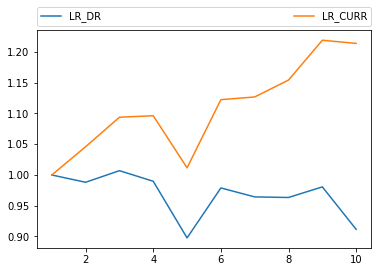

In [20]:
loss_ratio_relativity(output_data, current_pred, loss)